In [1]:
using PyPlot

In [137]:
function getA(lam, n, dx)
    out = zeros(n, n)
    for i = 1:n
        out[i, i] = 1 - 2*lam + dx
        for j = 1:n
            if i == j-1 || i == j+1
                out[i, j] = lam
            end
        end
    end
    return out
end

function ForwardDiff(s, l, a, dt, dx, t, f)
    m = round(Int, (l-s)/dx) + 1
    w = zeros(m)
    x = zeros(m)
    lam = a^2*(dt/h^2)
    A = getA(lam, m, dt)
    for i = 1:m
        x[i] = -50 + i*h
        w[i] = f(x[i])
    end
    for i = 1:t/dt
        w[:] = A*w[:]
        w -= dt*(w.^2)
    end
    return x, w
end;

In [138]:
a = 1; # alpha
s = -50; # start point for x values
l = 50; # endpoint for x values
dx = 0.2; # l/m - step size, ∆x
dt = 0.01; # time step size, ∆t
# The grid points are (x_i, t_j) where 
# x_i = i*dx for i=0,1,...,m
# t_j = j*dt for j=0,1,...

0.01

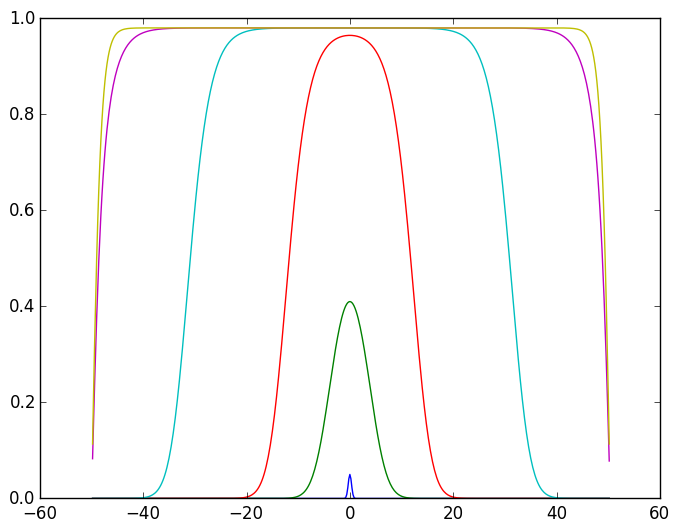

In [139]:
f = x -> 0.05*exp(-5*x^2); # u(x, 0) - initial condition
for t = [0, 5, 10, 20, 30, 40]
    x, w = ForwardDiff(s, l, a, dt, dx, t, f);
    plot(x, w);
end;

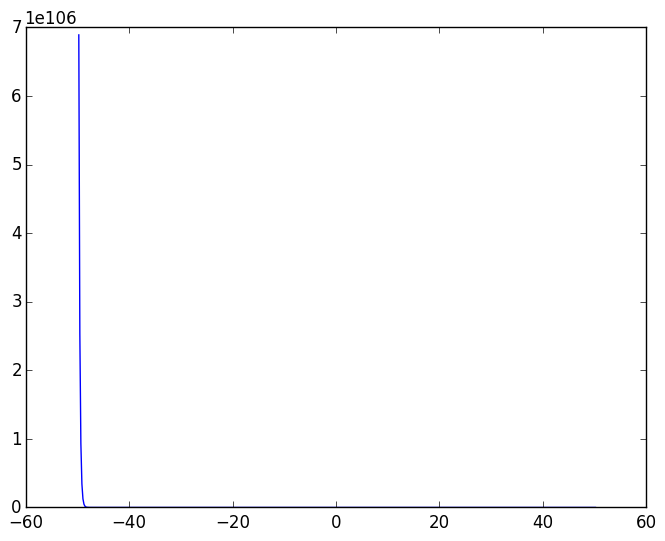

In [101]:
f = x -> 2 + 0.05*exp(-5*x); # u(x, 0) - initial condition
for t = [0, 5, 10, 20, 30, 40]
    x, w = ForwardDiff(s, l, a, dt, dx, t, f)
    plot(x, w);
end;